# Linear SVC

[LinearSVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
```
LinearSVC(penalty, loss, dual, tol, C, multi_class, fit_intercept, intercept_scaling, class_weight, verbose, random_state, max_iter)
```
- <font color=blue> penalty : 규제에 사용 된 기준을 지정 (l1, l2) – default : l2 </font>
- loss : 손실함수
- dual : 이중 또는 초기 공식
- tol : 정밀도
- <font color=blue> C : 규제 강도 </font>
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- verbose : 동작 과정에 대한 출력 메시지
- random_state : 난수 seed 설정
- max_iter : 계산에 사용할 작업 수

In [7]:
# !pip install mglearn

In [8]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.svm import LinearSVC

In [9]:
  # 데이터 로드
  X, y = make_forge()

In [10]:
# 모델 학습
model = LinearSVC(max_iter=10000).fit(X, y)

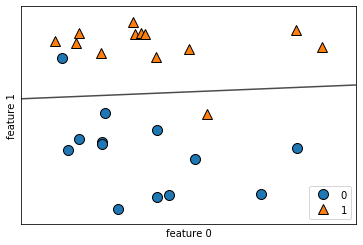

In [11]:
# 결정경계 시각화
mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1], y)

plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.legend(loc=4)
plt.show()

- 2개의 포인트가 잘 못 분류됨 -> L2 규제를 사용

- <font color=blue>Linear SVC에서는 C 값을 사용하여 규제</font>

### C 값의 변화에 따른 결정경계의 변화
- C의 값이 높아지면 규제가 감소 -> 훈련 세트에 최대한 맞추려 함 (개개의 데이터 포인트를 정확히 분류하려고 노력)
- C의 값이 낮아지면 규제가 증가 -> w가 0에 가까워지도록 만듬  (데이터 포인트 중 다수에 맞추려고 함)

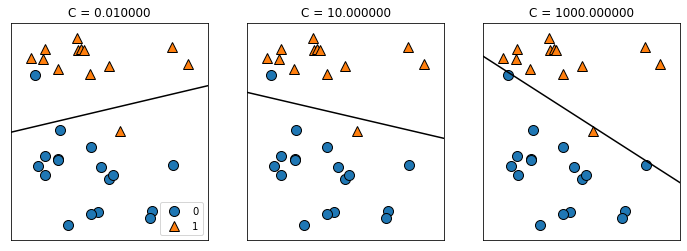

In [12]:
# linear SVC 결정경계 변화
mglearn.plots.plot_linear_svc_regularization()

- 왼쪽 그림은 아주 작은 C 값 때문에 클래스 0은 아래쪽에 1은 위쪽에 대부분 배치, 2개가 잘못 분류 (결정경계가 수평에 가까움)
- C 값이 올라가면 결정경계가 기울어지며 최종적으로 클래스 0은 모두 아래쪽에 위치됨 -> 과대 적합

#### Linear SVC 실습 01

와인 데이터 분류

In [13]:
from sklearn.datasets import load_wine

# 데이터 로드
wine = load_wine()
wine.feature_names, wine.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [14]:
# 훈련셋 및 테스트셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0)

In [15]:
# 모델학습
from sklearn.svm import LinearSVC

model = LinearSVC(C=1, max_iter=10000).fit(X_train, y_train)

C:\Users\ksmks\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [19]:
# 스코어 확인
model.score(X_train, y_train), model.score(X_test, y_test)

(3, 13)

In [17]:
# 예측
pred = model.predict(X_test)
pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1])

#### Linear SVC 실습 02

붓꽃 데이터 분류

In [12]:
# 데이터 로드
from sklearn.datasets import load_iris

iris = load_iris()

In [13]:
# 훈련셋 및 테스트셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [14]:
# 모델학습
from sklearn.svm import LinearSVC

model = LinearSVC(C=1, max_iter=10000).fit(X_train, y_train)

In [15]:
# 스코어 확인
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9821428571428571, 0.9210526315789473)

In [16]:
# 예측
pred = model.predict(X_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2])

## Linear SVC와 Logistic Regression의 장단점

- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C
- alpha 값이 클수록, C 값이 작을수록 모델이 단순해짐
- 회귀 모델에서 이 매개변수를 조정하는 일이 매우 중요

- L1 규제를 사용할지 L2 규제를 사용할지를 정해야 함
- 중요한 특성이 많지 않다고 생각하면 L1 규제를 사용하고 그렇지 않으면 기본적으로 L2 규제를 사용

- 선형 모델은 학습 속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동
- 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 LogisticRegression과 Ridge에 solver=’sag’ 옵션 20 을 줌

- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동
- 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용